## **Q1**
### *Part A:* Confirm that this function is a valid PDF

In [123]:
# Imports:
import numpy as np
import sympy

In [124]:
t = sympy.symbols('t')
Lambda = 500

In [125]:
ft = (2 * t / Lambda**2) * sympy.exp(-t**2 / Lambda**2)
ft

t*exp(-t**2/250000)/125000

In [126]:
print(f'The area under the curve: {sympy.integrate(ft, [t, 0 ,sympy.oo])}')

The area under the curve: 1


### *Part B:* 

In [127]:
for p in [0.01, 0.1, 0.5, 0.99]:
    print(f'{int(p*100)}% = {round(Lambda * np.sqrt(-np.log(1-p)), 2)}')

1% = 50.13
10% = 162.3
50% = 416.28
99% = 1072.98


### Part C: Calculate the Expectation

In [128]:
ex_t = sympy.integrate(t * ft, [t, 0, sympy.oo])
ex_t

250*sqrt(pi)

#### failure function:

In [129]:
p_of_failure = sympy.integrate(ft, [t, 0, ex_t])
p_of_failure

1 - exp(-pi/4)

#### What is the probability failure of expected lifetime where the pump started to fail?

In [130]:
p_of_failure = sympy.integrate(ft, [t, 0, 500 * np.sqrt(np.pi)])
p_of_failure

0.956786081736228

#### Part D: Calculate variance and Standard Deviation of Pump Lifetime:

In [131]:
var = sympy.integrate((t - ex_t)**2 * ft, [t, 0, sympy.oo])
var

250000 - 62500*pi

In [132]:
std = np.sqrt(250000 - 62500 * np.pi)
std

231.62568758805216

#### What's the life range?

In [133]:
print("It's from: ", 500 * np.sqrt(np.pi) - std)
print("to: ", 500 * np.sqrt(np.pi) + std)

It's from:  654.6012378647058
to:  1117.8526130408102


#### Part E: Calculate Average Running Cost

In [134]:
Ft = sympy.integrate(ft, [t, 0, t])
Ft

1 - exp(-t**2/250000)

In [135]:
U = sympy.symbols('U')
sympy.solve(U - Ft, t)

[-500*sqrt(log(-1/(U - 1))), 500*sqrt(log(-1/(U - 1)))]

#### In case 1 where t_m = 1:

In [136]:
import math

n_samples = 10**6 
t_samples, runing_c = np.zeros((n_samples,)), np.zeros((n_samples,))
uf = np.random.uniform()

In [137]:
for  t_m in [1,10, 100, 1000, 10000]:
    for k in range(n_samples):   
        t_samples[k]= math.log(-1/(uf-1))*1000

        if t_samples[k]<=t_m:
            runing_c[k]=250/t_samples[k]
        else:
            runing_c[k]=50/t_m

        uf = np.random.uniform()

    avg_sample, var_sample, avg_r = np.mean(t_samples), np.var(t_samples), np.mean(runing_c)

    print(f'For t_m = {t_m}:')
    print('Number of Sample: ', n_samples)
    print('Sample Average: ', avg_sample)
    print('Sample Variance: ', var_sample)
    print(f'Average Cost for tm = {t_m}: {round(avg_r,2)}')
    print('-'*44)

For t_m = 1:
Number of Sample:  1000000
Sample Average:  1000.8509342759656
Sample Variance:  1005631.8180711793
Average Cost for tm = 1: 52.84
--------------------------------------------
For t_m = 10:
Number of Sample:  1000000
Sample Average:  999.068402689305
Sample Variance:  996997.4729858737
Average Cost for tm = 10: 8.0
--------------------------------------------
For t_m = 100:
Number of Sample:  1000000
Sample Average:  999.4293888966338
Sample Variance:  998789.5505758182
Average Cost for tm = 100: 3.94
--------------------------------------------
For t_m = 1000:
Number of Sample:  1000000
Sample Average:  999.5547746344558
Sample Variance:  998933.7088760313
Average Cost for tm = 1000: 3.28
--------------------------------------------
For t_m = 10000:
Number of Sample:  1000000
Sample Average:  998.9307880738246
Sample Variance:  998314.9573144615
Average Cost for tm = 10000: 3.13
--------------------------------------------


## **Q3**

In [138]:
import matplotlib.pyplot as plt

j0 = 0.1
segma = 0.05
K1 = (3*segma + (9*(segma**2) +4*j0)**-2/-j0*2)**2
K2 = (3*segma - (9*(segma**2) +4*j0)**-2/-j0*2)**2

print(f'Case one required: {round(K1,2)} secound')
print(f'Case two required: {round(K2,2)} secound')


Case one required: 12519.57 secound
Case two required: 12586.8 secound


In [139]:
K = 1
Ks = np.zeros([10**6,20])
steps = np.arange(20)

In [140]:
for s in range(10**6):
    for ss in steps:
        Ks[s,ss] = K
        v = np.random.normal(0,segma)
        K = K - j0 - v

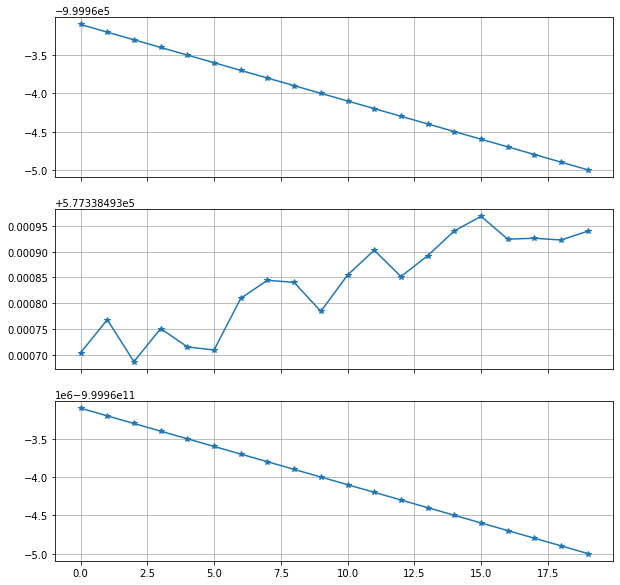

In [141]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,10)

ax[0].plot(steps,np.mean(Ks,0),'*-')
ax[0].grid()

ax[1].plot(steps,np.std(Ks,0),'*-')
ax[1].grid()

ax[2].plot(steps,np.sum(Ks,0),'*-')
plt.grid()

## Q4:
##### Define Dyanmics, Noise Variance, Measurement Model:

In [142]:
n_steps = 10 

A = np.mat([[1]])
V = np.mat([[9]])
H = np.mat([[1]])
W = np.mat([[25]])

measurements = [np.nan, 17.8, 22.6, 30.2, 37.3, 46.2, 49.5, 44.6, 50.3, 56.3, 51.6]
uf_lst = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
m = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

hat_x_m = np.mat([[20]]) 
P_m = np.mat([[25]])

hist_hat_x_m, hist_P_m = np.zeros([n_steps + 1]), np.zeros([n_steps + 1])  
hist_hat_x_m[0], hist_P_m[0] = hat_x_m[0], P_m[0]

In [143]:
for k in np.arange(1,n_steps+1):

    uf = uf_lst[k-1] - m[k-1]
    u = np.matrix([[uf]])

    hat_x_p = A*hat_x_m + u
    P_p = A**2*P_m + V
    z = measurements[k]
    K = P_p @ H.T @ np.linalg.inv(H @ P_p @ H.T + W)
    hat_x_m = hat_x_p + K @ (z - H @ hat_x_p)
    P_m = (np.eye(1) - K @ H) @ P_p @ (np.eye(1) - K @ H).T + K @ W @ K.T
    
    hist_hat_x_m[k] = hat_x_m[0]
    hist_P_m[k] = P_m[0]

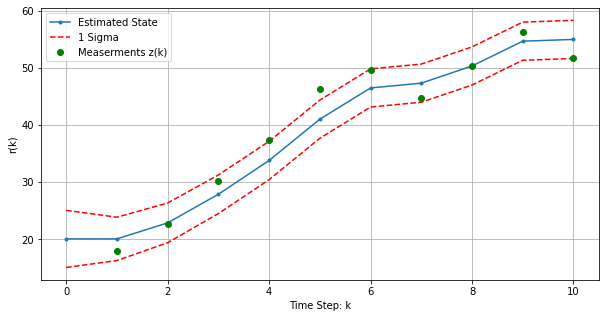

In [144]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))

ax.plot(hist_hat_x_m[:],'.-',label="Estimated State")
ax.plot(hist_hat_x_m[:]+np.sqrt(hist_P_m[:]),'r--',label="1 Sigma")
ax.plot(hist_hat_x_m[:]-np.sqrt(hist_P_m[:]),'r--',)
ax.plot(measurements,'go',label="Measerments z(k)")

ax.set_ylabel('r(k)')
ax.set_xlabel('Time Step: k')
ax.legend()
ax.grid()

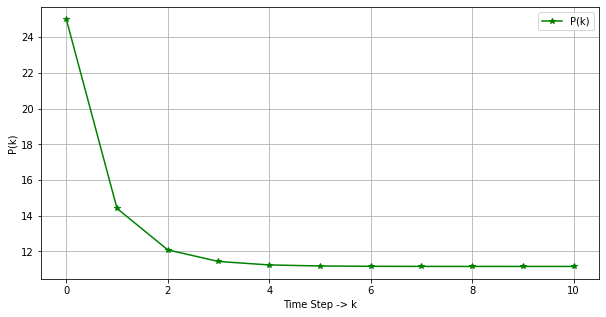

In [145]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))

ax.plot(hist_P_m[:],'g*-',label="P(k)")

ax.set_xlabel('Time Step -> k')
ax.set_ylabel('P(k)')
ax.legend()
ax.grid(True)

#### **Part B:** Define Dyanmics, Noise Variance, Measurement Model

In [146]:
A = np.matrix([[1,-1],[0,1]])
V = np.matrix([[0,0],[0,0.1]])
H = np.matrix([[1,0]])
W = np.matrix([[25]])

hat_x_m = np.mat([[20],[7]]) 
P_m = np.mat([[25,0],[0,1]])

n_steps = 10  

hist_hat_x_m = np.zeros([n_steps+1,2])  
hist_P_m = np.zeros([n_steps+1,2])  

hist_hat_x_m[0,0] = hat_x_m[0,0]
hist_hat_x_m[0,1] = hat_x_m[1,0]
hist_P_m[0,0] = P_m[0,0]
hist_P_m[0,1] = P_m[1,1]

uf = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [147]:
for k in np.arange(1,n_steps+1):

    uf = uf_lst[k-1]
    u = np.matrix([[uf],[0]])    
    
    hat_x_p = A @ hat_x_m + u
    P_p = A @ P_m @ A.T + V
    z = measurements[k]
    K = P_p @ H.T @ np.linalg.inv(H @ P_p @ H.T+ W)
    hat_x_m = hat_x_p + K @ (z - H @ hat_x_p)
    I = np.matrix([[1,0],[0,1]])
    P_m = (I-K @ H)@ P_p @(I-K @ H).T + K @ W @ K.T

    hist_hat_x_m[k,0] = hat_x_m[0,0]
    hist_hat_x_m[k,1] = hat_x_m[1,0]
    hist_P_m[k,0] = P_m[0,0]
    hist_P_m[k,1] = P_m[1,1]

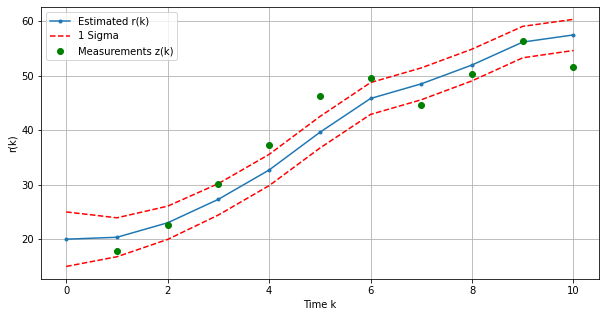

In [148]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))

ax.plot(hist_hat_x_m[:,0],'.-',label="Estimated r(k)")
ax.plot(hist_hat_x_m[:,0]+np.sqrt(hist_P_m[:,0]),'r--',label="1 Sigma")
ax.plot(hist_hat_x_m[:,0]-np.sqrt(hist_P_m[:,0]),'r--',)
ax.plot(measurements,'go',label="Measurements z(k)")

ax.set_ylabel('r(k)')
ax.set_xlabel('Time k')
ax.legend()
ax.grid()

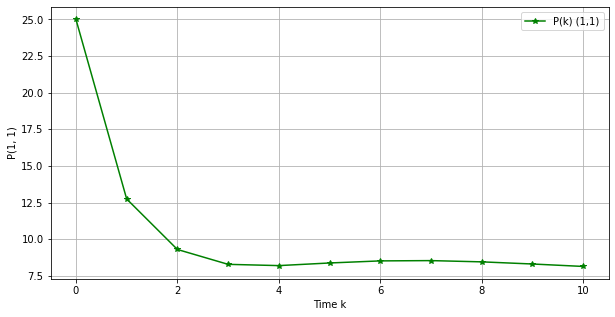

In [149]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))

ax.plot(hist_P_m[:,0],'g*-',label="P(k) (1,1)")

ax.set_xlabel('Time k')
ax.set_ylabel('P(1, 1)')
ax.legend()
ax.grid(True)

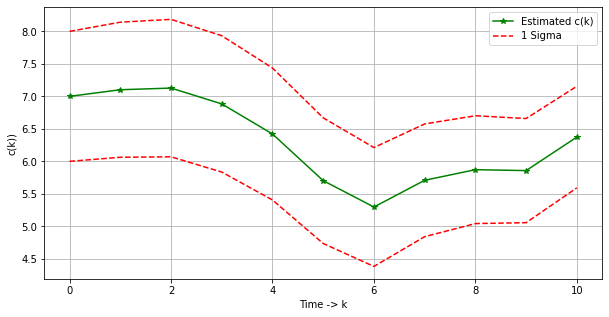

In [150]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))

ax.plot(hist_hat_x_m[:,1],'g*-',label="Estimated c(k)")
ax.plot(hist_hat_x_m[:,1]+np.sqrt(hist_P_m[:,1]),'r--',label="1 Sigma")
ax.plot(hist_hat_x_m[:,1]-np.sqrt(hist_P_m[:,1]),'r--')

ax.set_xlabel('Time -> k')
ax.set_ylabel('c(k))')
ax.grid(True)
ax.legend()

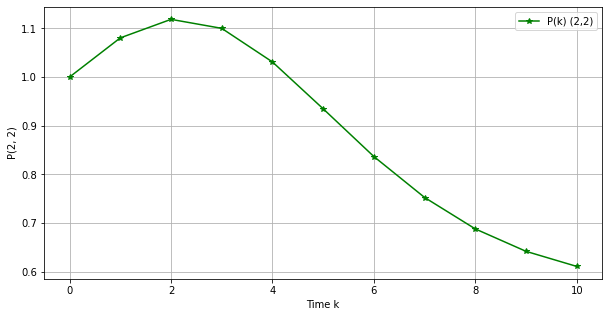

In [151]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))
ax.plot(hist_P_m[:,1],'g*-',label="P(k) (2,2)")
ax.set_xlabel('Time k')
ax.set_ylabel('P(2, 2)')
ax.legend()
ax.grid(True)

#### Part (C - III)

In [152]:
a=0.3
A = np.matrix([[1-2*a, a, a, 0, -1, 0, 0, 0],
               [a, 1-2*a, a, 0, 0, -1, 0, 0],
               [a, 0, 1-3*a, a, 0, 0, -1, 0],
               [0, 0, a, 1-a, 0, 0, 0, -1],
               [0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0],
               [0,0,0,0,0,0,0,1]])

V = np.diag([0,0,0,0,0.1,0.1,0.1,0.1])

H = np.eye(3,8)

W = np.eye(3)*25

j=0

measurements1 = np.array([np.nan, 59.3, 72, 64.4, 83.6, 84.9, 94.3, 84, 86.6, 89, 89.1])
measurements2 = np.array([np.nan, 39.1, 38.4, 36.2, 43.4, 50.5, 56.3, 40.3, 58.5, 55.4, 59.6])
measurements4 = np.array([np.nan, 31.1, 31.2, 41.6, 44.4, 41, 41.9, 39.2, 46.3, 43.3, 45.3])

uf = [[30],[0],[0],[0],[0],[0],[0],[0]]
measurements=np.matrix([[np.nan, 59.3, 72, 64.4, 83.6, 84.9, 94.3, 84, 86.6, 89, 89.1],
               [np.nan, 39.1, 38.4, 36.2, 43.4, 50.5, 56.3, 40.3, 58.5, 55.4, 59.6],
               [np.nan, 31.1, 31.2, 41.6, 44.4, 41, 41.9, 39.2, 46.3, 43.3, 45.3]])

hat_x_m = np.mat([[20],[40],[60],[20],[7],[7],[7],[7]])

P_m = np.diag([20,20,20,20,1,1,1,1])

n_steps = 10

hist_hat_x_m = np.zeros([n_steps+1,8])  
hist_P_m = np.zeros([n_steps+1,8])  

hist_hat_x_m[0,0] = hat_x_m[0,0]
hist_hat_x_m[0,1] = hat_x_m[1,0]
hist_hat_x_m[0,2] = hat_x_m[2,0]
hist_hat_x_m[0,3] = hat_x_m[3,0]
hist_hat_x_m[0,4] = hat_x_m[4,0]
hist_hat_x_m[0,5] = hat_x_m[5,0]
hist_hat_x_m[0,6] = hat_x_m[6,0]
hist_hat_x_m[0,7] = hat_x_m[7,0]

hist_P_m[0,0] = P_m[0,0]
hist_P_m[0,1] = P_m[1,1]
hist_P_m[0,2] = P_m[2,2]
hist_P_m[0,3] = P_m[3,3]
hist_P_m[0,4] = P_m[4,4]
hist_P_m[0,5] = P_m[5,5]
hist_P_m[0,6] = P_m[6,6]
hist_P_m[0,7] = P_m[7,7]


In [153]:
for k in np.arange(1,n_steps+1):

    uf = uf_lst[k-1]
    u = np.matrix([[uf],[0],[0],[0],[0],[0],[0],[0]])
    
    hat_x_p = A @ hat_x_m + u
    P_p = A @ P_m @ A.T + V
    z = measurements[:,k]    
    K = P_p @ H.T @ np.linalg.inv(H @ P_p @ H.T + W)
    hat_x_m = hat_x_p + K @ (z - H @ hat_x_p)
    P_m = (np.eye(8) - K @ H) @ P_p @ (np.eye(8) - K @ H).T + K @ W @ K.T

    hist_hat_x_m[k,0] = hat_x_m[0,0]
    hist_hat_x_m[k,1] = hat_x_m[1,0]
    hist_hat_x_m[k,2] = hat_x_m[2,0]
    hist_hat_x_m[k,3] = hat_x_m[3,0]
    hist_hat_x_m[k,4] = hat_x_m[4,0]
    hist_hat_x_m[k,5] = hat_x_m[5,0]
    hist_hat_x_m[k,6] = hat_x_m[6,0]
    hist_hat_x_m[k,7] = hat_x_m[7,0]
    
    hist_P_m[k,0] = P_m[0,0]
    hist_P_m[k,1] = P_m[1,1]
    hist_P_m[k,2] = P_m[2,2]
    hist_P_m[k,3] = P_m[3,3]
    hist_P_m[k,4] = P_m[4,4]
    hist_P_m[k,5] = P_m[5,5]
    hist_P_m[k,6] = P_m[6,6]
    hist_P_m[k,7] = P_m[7,7]

Text(0.5, 0, 'Time k')

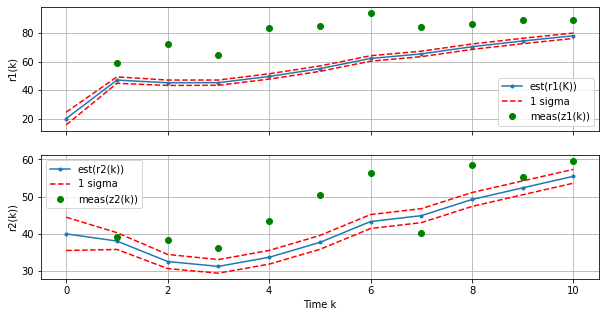

In [154]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10, 5))

ax[0].plot(hist_hat_x_m[:,0],'.-',label="est(r1(K))")
ax[0].plot(hist_hat_x_m[:,0]+np.sqrt(hist_P_m[:,0]),'r--',label="1 sigma")
ax[0].plot(hist_hat_x_m[:,0]-np.sqrt(hist_P_m[:,0]),'r--',)
ax[0].plot(measurements1,'go',label="meas(z1(k))")

ax[0].set_ylabel('r1(k)')
ax[0].legend()
ax[0].grid()

ax[1].plot(hist_hat_x_m[:,1],'.-',label="est(r2(k))")
ax[1].plot(hist_hat_x_m[:,1]+np.sqrt(hist_P_m[:,1]),'r--',label="1 sigma")
ax[1].plot(hist_hat_x_m[:,1]-np.sqrt(hist_P_m[:,1]),'r--')
ax[1].plot(measurements2,'go',label="meas(z2(k))")

ax[1].set_ylabel('r2(k))')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Time k')

Text(0.5, 0, 'Time k')

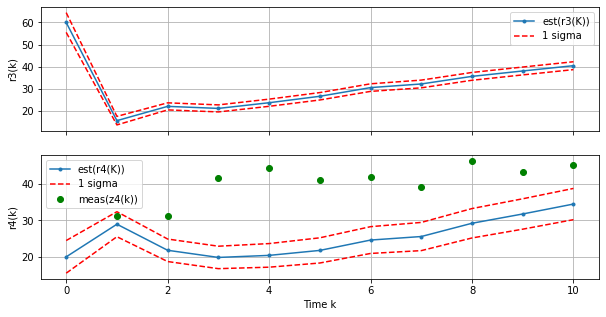

In [155]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10, 5))

ax[0].plot(hist_hat_x_m[:,2],'.-',label="est(r3(K))")
ax[0].plot(hist_hat_x_m[:,2]+np.sqrt(hist_P_m[:,2]),'r--',label="1 sigma")
ax[0].plot(hist_hat_x_m[:,2]-np.sqrt(hist_P_m[:,2]),'r--',)

ax[0].set_ylabel('r3(k)')
ax[0].legend()
ax[0].grid()

ax[1].plot(hist_hat_x_m[:,3],'.-',label="est(r4(K))")
ax[1].plot(hist_hat_x_m[:,3]+np.sqrt(hist_P_m[:,3]),'r--',label="1 sigma")
ax[1].plot(hist_hat_x_m[:,3]-np.sqrt(hist_P_m[:,3]),'r--',)
ax[1].plot(measurements4,'go',label="meas(z4(k))")

ax[1].set_ylabel('r4(k)')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Time k')

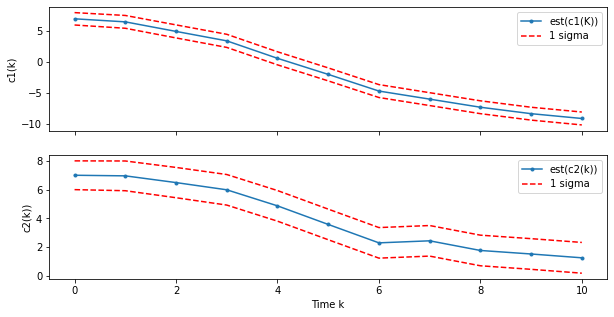

In [156]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10, 5))

ax[0].plot(hist_hat_x_m[:,4],'.-',label="est(c1(K))")
ax[0].plot(hist_hat_x_m[:,4]+np.sqrt(hist_P_m[:,4]),'r--',label="1 sigma")
ax[0].plot(hist_hat_x_m[:,4]-np.sqrt(hist_P_m[:,4]),'r--',)

ax[1].plot(hist_hat_x_m[:,5],'.-',label="est(c2(k))")
ax[1].plot(hist_hat_x_m[:,5]+np.sqrt(hist_P_m[:,5]),'r--',label="1 sigma")
ax[1].plot(hist_hat_x_m[:,5]-np.sqrt(hist_P_m[:,5]),'r--')
ax[1].set_xlabel('Time k')

ax[0].set_ylabel('c1(k)')
ax[1].set_ylabel('c2(k))')
ax[0].legend()
ax[1].legend()

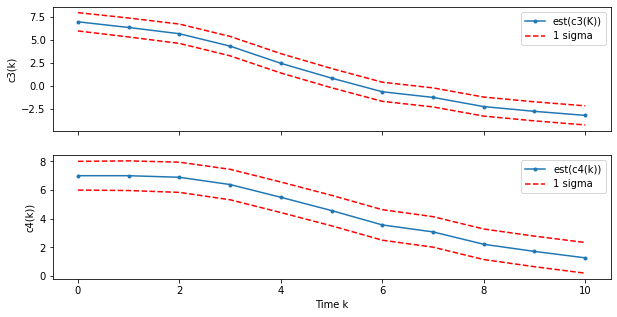

In [157]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10, 5))

ax[0].plot(hist_hat_x_m[:,6],'.-',label="est(c3(K))")
ax[0].plot(hist_hat_x_m[:,6]+np.sqrt(hist_P_m[:,4]),'r--',label="1 sigma")
ax[0].plot(hist_hat_x_m[:,6]-np.sqrt(hist_P_m[:,4]),'r--',)

ax[1].plot(hist_hat_x_m[:,7],'.-',label="est(c4(k))")
ax[1].plot(hist_hat_x_m[:,7]+np.sqrt(hist_P_m[:,5]),'r--',label="1 sigma")
ax[1].plot(hist_hat_x_m[:,7]-np.sqrt(hist_P_m[:,5]),'r--')
ax[1].set_xlabel('Time k')

ax[0].set_ylabel('c3(k)')
ax[1].set_ylabel('c4(k))')
ax[0].legend()
ax[1].legend()

Text(0.5, 0, 'Time k')

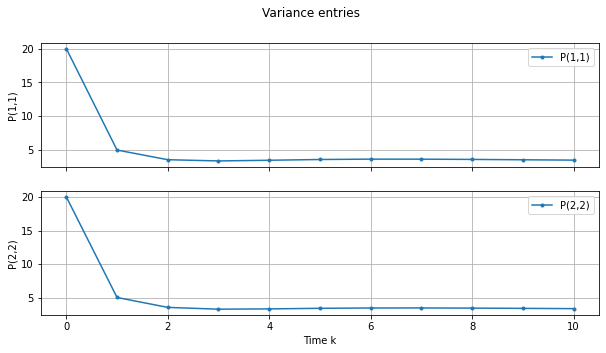

In [158]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10, 5))
fig.suptitle('Variance entries')

ax[0].plot(hist_P_m[:,0],'.-',label="P(1,1)")

ax[0].set_ylabel('P(1,1)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(hist_P_m[:,1],'.-',label="P(2,2)")

ax[1].set_ylabel('P(2,2)')
ax[1].legend()
ax[1].grid(True)
ax[1].set_xlabel('Time k')

Text(0.5, 0, 'Time k')

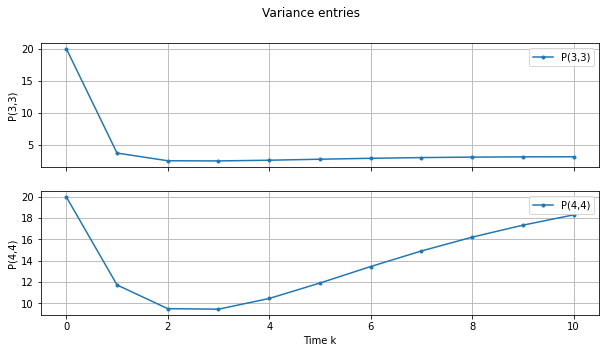

In [159]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10, 5))
fig.suptitle('Variance entries')

ax[0].plot(hist_P_m[:,2],'.-',label="P(3,3)")

ax[0].set_ylabel('P(3,3)')
ax[0].legend()
ax[0].grid()

ax[1].plot(hist_P_m[:,3],'.-',label="P(4,4)")

ax[1].set_ylabel('P(4,4)')
ax[1].legend()
ax[1].grid()

ax[1].set_xlabel('Time k')

Text(0.5, 0, 'Time k')

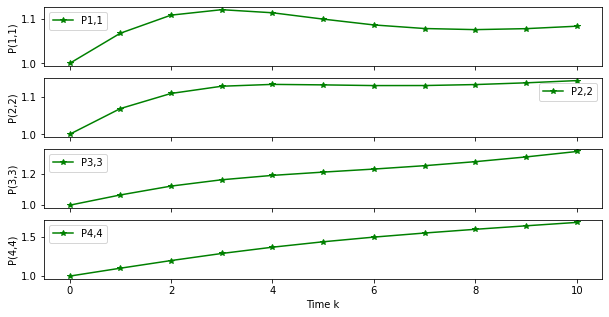

In [160]:
fig, ax = plt.subplots(4,1,sharex=True, figsize=(10, 5))

ax[0].plot(hist_P_m[:,4],'g*-',label="P1,1")

ax[0].set_ylabel('P(1,1)')
ax[0].legend()

ax[1].plot(hist_P_m[:,5],'g*-',label="P2,2")

ax[1].set_ylabel('P(2,2)')
ax[1].legend()

ax[2].plot(hist_P_m[:,6],'g*-',label="P3,3")

ax[2].set_ylabel('P(3,3)')
ax[2].legend()

ax[3].plot(hist_P_m[:,7],'g*-',label="P4,4")

ax[3].set_ylabel('P(4,4)')
ax[3].legend()

ax[3].set_xlabel('Time k')

In [161]:
for n in range(4):
    P_m_after1 = hist_P_m[:,n]
    print(P_m_after1)
    print('-'*44)

[20.          5.00517304  3.57843529  3.39794753  3.49763262  3.60941167
  3.66150532  3.6581174   3.6210311   3.56958453  3.51650074]
--------------------------------------------
[20.          5.07184441  3.60279443  3.33590626  3.37931201  3.46577084
  3.51468143  3.51974437  3.49566136  3.45763863  3.41632442]
--------------------------------------------
[20.          3.75817144  2.56182351  2.53565944  2.64618783  2.80114172
  2.94528135  3.05576128  3.12828122  3.16776454  3.18231081]
--------------------------------------------
[20.         11.73089783  9.50611462  9.45723406 10.46219507 11.91302609
 13.45983938 14.92013361 16.21847972 17.34233642 18.31038074]
--------------------------------------------


#### Solving EFK without measurements

In [162]:
def get_H(x):
    return 3*(x-1)**2

A = 1
L = -1
M = 1
V = 0.05**2
W = 0.1**2

j0=0.1
n_steps = 9
hat_x_m = 1
P_m = 0

hist_hat_x_m = np.zeros([n_steps+1,1])  
hist_P_m = np.zeros([n_steps+1,1]) 
hist_true_x = np.zeros([n_steps+1,1])  
true_state_x = np.random.normal(1,0)
hist_z = np.zeros([n_steps+1,1])

hist_hat_x_m[0,0] = hat_x_m
hist_P_m[0,0] = P_m
hist_true_x[0,0] = true_state_x

In [163]:
for k in np.arange(1,n_steps+1):

    v = np.random.normal(0, 0.05)

    true_state_x = true_state_x - j0 - v

    w = np.random.normal(0, 0.1)
    z = 4 + ((true_state_x)-1)**3 + w
    
    hist_z[k,0]=z
    hat_x_p = hat_x_m - j0 - 0 
    P_p = A*P_m*A + L*V*L 
    
    H = get_H(hat_x_p)
    K = P_p*H*1/(H*P_p*H + W) 
    
    pred_avg = 4 + ((hat_x_p)-1)**3 + 0 
    hat_x_m = hat_x_p + K*(z-pred_avg)
    I = 1
    P_m = (I - K*H)*P_p*(I - K*H) + K*W*K 

    hist_hat_x_m[k,0] = hat_x_m
    hist_P_m[k,0] = P_m
    hist_true_x[k,0] = true_state_x

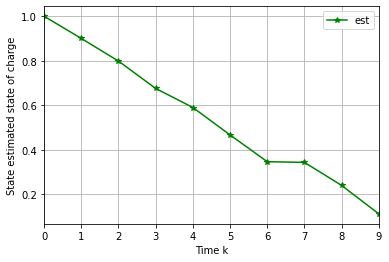

In [164]:
plt.plot(hist_hat_x_m[:,0],'g*-',label="est")
plt.xlim(0,9)
plt.xlabel('Time k')
plt.ylabel('State estimated state of charge')
plt.legend()
plt.grid(True)
plt.show()

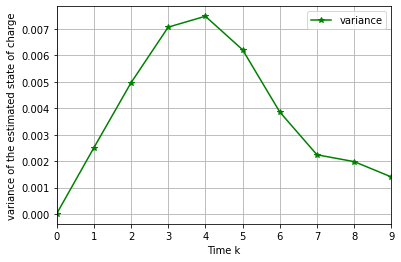

In [165]:
plt.plot(hist_P_m[:,0],'g*-',label="variance")
plt.xlabel('Time k')
plt.xlim(0,9)
plt.ylabel('variance of the estimated state of charge')
plt.legend()
plt.grid(True)

#### Part C:

In [166]:
n_steps = 9
x0 = 1
pp=0.1
W=0.1

t_array = np.arange(n_steps+1)

x_array = np.zeros(n_steps+1)
hArray = np.zeros(n_steps+1)
uArray = np.zeros(n_steps+1)
a=np.zeros(n_steps+1)
b=np.zeros(n_steps+1)

x_array[0]=x0
hArray[0]=(x_array[0]-1)**2
a[0]=hArray[0]**2*pp
b[0]=hArray[0]**2*pp+W
uArray[0]=a[0]/b[0]

def q(x, u, v):
    return  x - u - v  

In [167]:
for k in range(n_steps):
        u = 0.1
        v = np.random.normal(0,0.05)
        x_array[k+1] = q(x_array[k], u, v)
        hArray[k+1] = 3*(x_array[k+1]-1)**2
        a[k+1]=pp*hArray[k+1]**2
        b[k+1]=pp*hArray[k+1]**2+W
        uArray[k+1] = a[k+1]/b[k+1]

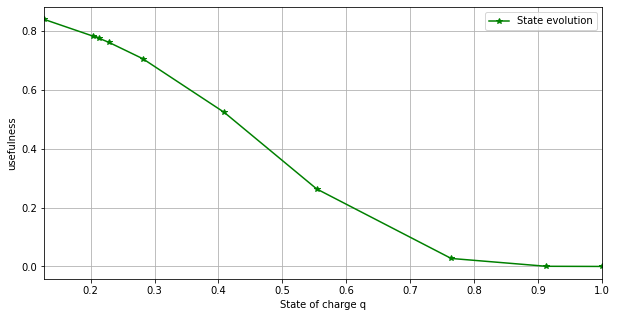

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x_array, uArray, 'g*-', label='State evolution')
ax.set_xlim([x_array[-1], x_array[0]])
ax.set_xlabel('State of charge q')
ax.set_ylabel('usefulness')
ax.legend()
ax.grid(True)
plt.show()

In [169]:
q=np.linspace(0, 1, 100)
h=3*(q-1)**2
a=h**2*0.1
b=a+0.1
z=(a/b)

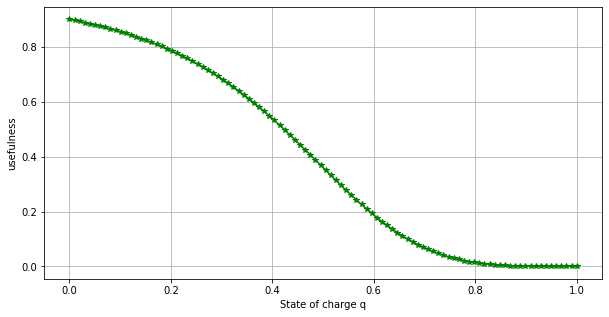

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(q, z, 'g*-', label='State evolution')
ax.set_xlabel('State of charge q')
ax.set_ylabel('usefulness')
plt.grid()
plt.show()

#### Part D:

In [171]:
def get_H(x):
    return 3*(x-1)**2

V = 0.05**2
W = 0.1**2 
j0=0.1

n_steps = 9 
hat_x_m = 1 
P_m = 0

hist_hat_x_m = np.zeros([n_steps+1,1])  
hist_P_m = np.zeros([n_steps+1,1]) 
hist_true_x = np.zeros([n_steps+1,1])  
true_state_x = np.random.normal(1,0)
hist_z = np.zeros([n_steps+1,1])

hist_hat_x_m[0,0] = hat_x_m
hist_P_m[0,0] = P_m
hist_true_x[0,0] = true_state_x

measurment_z=[4.21, 3.83, 3.92, 3.89, 3.88, 3.89, 3.91, 3.57, 3.21]

In [172]:
for k in np.arange(1,n_steps+1):

    v = np.random.normal(0, 0.05)

    new_x = true_state_x - j0 - v
    true_state_x = new_x

    w = np.random.normal(0, 0.1)

    z=measurment_z[k-1]

    hist_z[k,0]=z

    hat_x_p = hat_x_m - j0 - 0  
    P_p = A*P_m*A + L*V*L 
    
    H = get_H(hat_x_p)
    K = P_p*H*1/(H*P_p*H + W)
    
    pred_avg = 4 + ((hat_x_p)-1)**3 + 0 
    
    hat_x_m = hat_x_p + K*(z-pred_avg)
    I = 1
    P_m = (I - K*H)*P_p*(I - K*H) + K*W*K 

    hist_hat_x_m[k,0] = hat_x_m
    hist_P_m[k,0] = P_m
    hist_true_x[k,0] = true_state_x

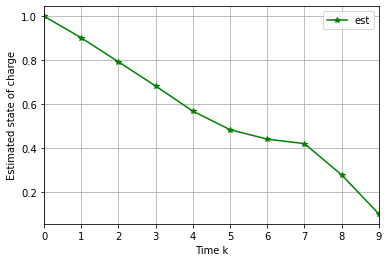

In [173]:
plt.plot(hist_hat_x_m[:,0],'g*-',label="est")
plt.xlim(0,9)
plt.xlabel('Time k')
plt.ylabel('Estimated state of charge')
plt.legend()
plt.grid()

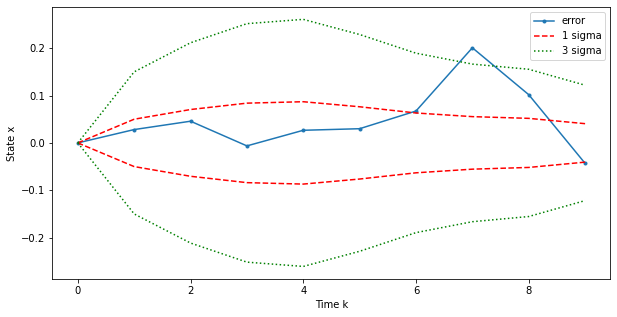

In [174]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))
ax.plot(hist_hat_x_m[:,0]-hist_true_x[:,0],'.-',label="error")
ax.plot(+np.sqrt(hist_P_m[:,0]),'r--',label="1 sigma")
ax.plot(-np.sqrt(hist_P_m[:,0]),'r--',)
ax.plot(+3*np.sqrt(hist_P_m[:,0]),'g:',label="3 sigma")
ax.plot(-3*np.sqrt(hist_P_m[:,0]),'g:',)
ax.set_xlabel('Time k')
ax.set_ylabel('State x')
ax.legend()
plt.show()

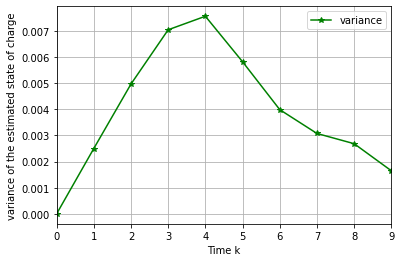

In [175]:
plt.plot(hist_P_m[:,0],'g*-',label="variance")
plt.xlabel('Time k')
plt.xlim(0,9)
plt.ylabel('variance of the estimated state of charge')
plt.legend()
plt.grid(True)

#### Part E:

In [176]:
j0=0.1
sigma=0.05
mean_q=1-9*j0
var_q=9*sigma**2

print(mean_q)
print(var_q)

0.09999999999999998
0.022500000000000006


In [177]:
print(hist_hat_x_m[9])
print(hist_P_m[9])

[0.09888289]
[0.00164824]


In [178]:
measurements=np.array([0, 4.21, 3.83, 3.92, 3.89, 3.88, 3.89, 3.91, 3.57, 3.21 ])

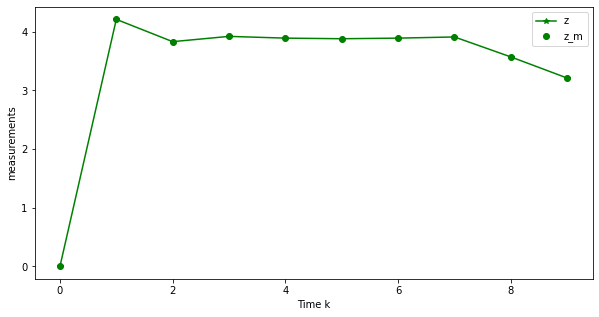

In [179]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(10, 5))
ax.plot(hist_z[:,0],'g*-',label="z")
ax.plot(measurements,'go',label="z_m")
ax.set_xlabel('Time k')
ax.set_ylabel('measurements')
ax.legend()
plt.show()